#Course 02
Convolutional Neural Networks in TensorFlow

##Week 04 : Multiclass Classification

###Rock Paper Scissor multiclass classification :

http://www.laurencemoroney.com/rock-paper-scissors-dataset/

Rock Paper Scissors is a dataset containing 2,892 images of diverse hands in Rock/Paper/Scissors poses. It is licensed CC By 2.0 and available for all purposes, but it’s intent is primarily for learning and research.

Rock Paper Scissors contains images from a variety of different hands,  from different races, ages and genders, posed into Rock / Paper or Scissors and labelled as such. You can download the training set here, and the test set here. These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images. I also generated a few images that you can use for predictions. You can find them here.

Note that all of this data is posed against a white background.

Each image is 300×300 pixels in 24-bit color

You'll see how this dataset can be used to build a multi-class classifier in the next video

In [0]:
#download the dataset:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-04-02 20:21:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  51.4MB/s    in 3.7s    

2020-04-02 20:21:34 (51.4 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-04-02 20:21:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/

In [0]:
# Then we need to unzip and place  it  a folder structure for the ImageDataGenerator :

import os
import zipfile

zipped_train_file_path =  '/tmp/rps.zip'
zipped_test_file_path = '/tmp/rps-test-set.zip'


#lets now unzip it all :

zip_ref = zipfile.ZipFile(zipped_train_file_path,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

zip_ref = zipfile.ZipFile(zipped_test_file_path ,'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

# Now you can check it already has the paper, rock , scissors folder created under them 

In [0]:
# now lets create the directory structure :

rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('Total Training Rock Images : ', len(os.listdir(rock_dir)))
print('Total Training Paper Images :', len(os.listdir(paper_dir)))
print('Total training Scissors Images :',len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[0:5])

paper_files = os.listdir(paper_dir)
print(paper_files[0:5])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[0:10])


Total Training Rock Images :  840
Total Training Paper Images : 840
Total training Scissors Images : 840
['rock07-k03-000.png', 'rock04-063.png', 'rock03-037.png', 'rock04-086.png', 'rock07-k03-023.png']
['paper02-086.png', 'paper02-065.png', 'paper05-108.png', 'paper05-060.png', 'paper05-001.png']
['scissors02-068.png', 'testscissors03-040.png', 'scissors02-087.png', 'testscissors03-028.png', 'scissors04-043.png', 'testscissors03-106.png', 'testscissors01-115.png', 'testscissors03-046.png', 'testscissors02-084.png', 'testscissors01-051.png']


In [0]:
# Lets plot some of them :

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

rock_files_list = [os.path.join(rock_dir,fnames) for fnames in os.listdir(rock_dir)[pic_index-2:pic_index]]
paper_files_list = [os.path.join(paper_dir,fnames) for fnames in os.listdir(paper_dir)[pic_index-2:pic_index]]
scissors_files_list = [os.path.join(scissors_dir,fnames) for fnames in os.listdir(scissors_dir)[pic_index-2:pic_index]]

complete_list_files = rock_files_list + paper_files_list + scissors_files_list

for i,img_path in enumerate(complete_list_files):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [0]:
# Now lets create the image data generator
import tensorflow as tf
import numpy as np

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                 rescale = 1.0/255.,
                 rotation_range = 40,
                 width_shift_range = 0.2,
                 height_shift_range = 0.2,
                 shear_range = 0.2,
                 zoom_range = 0.2,
                 horizontal_flip = True,
                 fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
                  directory = '/tmp/rps/',
                  target_size = (150,150),
                  class_mode = 'categorical',
                  batch_size = 20     
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                 rescale = 1.0/255.,
)

validation_generator = train_datagen.flow_from_directory(
                  directory = '/tmp/rps-test-set/',
                  target_size = (150,150),
                  class_mode = 'categorical',
                  batch_size = 12     
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [0]:
#Lets now build the model :

model = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(filters = 64, kernel_size =(3,3),activation = 'relu',input_shape = (150,150,3)),
                      tf.keras.layers.MaxPooling2D(2,2),

                      tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
                      tf.keras.layers.MaxPooling2D(2,2),

                      tf.keras.layers.Conv2D(filters = 128 , kernel_size = (3,3),activation = 'relu'),
                      tf.keras.layers.MaxPooling2D(2,2),

                      tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3),activation = 'relu'),
                      tf.keras.layers.MaxPooling2D(2,2),

                      tf.keras.layers.Flatten(),

                      tf.keras.layers.Dropout(0.5),

                      tf.keras.layers.Dense(units = 512,activation ='relu'),

                      tf.keras.layers.Dense(units = 3, activation = 'softmax')

])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [0]:
#lets now compile the model :

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = 'accuracy')

In [0]:
#lets now train the model :
history = model.fit_generator(train_generator,
          steps_per_epoch = 126,
          epochs = 10,
          validation_data = validation_generator,
          validation_steps = 31,
          verbose = 1)

Epoch 1/10
126/126 [==============================] - 25s 196ms/step - loss: 0.1233 - accuracy: 0.9599 - val_loss: 0.2580 - val_accuracy: 0.9032
Epoch 2/10
126/126 [==============================] - 25s 195ms/step - loss: 0.1237 - accuracy: 0.9607 - val_loss: 0.1767 - val_accuracy: 0.9274
Epoch 3/10
126/126 [==============================] - 24s 194ms/step - loss: 0.1148 - accuracy: 0.9671 - val_loss: 0.3950 - val_accuracy: 0.8441
Epoch 4/10
126/126 [==============================] - 25s 196ms/step - loss: 0.1059 - accuracy: 0.9675 - val_loss: 0.1135 - val_accuracy: 0.9516
Epoch 5/10
126/126 [==============================] - 25s 195ms/step - loss: 0.0888 - accuracy: 0.9746 - val_loss: 0.2779 - val_accuracy: 0.9086
Epoch 6/10
126/126 [==============================] - 25s 196ms/step - loss: 0.1173 - accuracy: 0.9702 - val_loss: 0.3135 - val_accuracy: 0.8817
Epoch 7/10
126/126 [==============================] - 25s 195ms/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.1331 - val_ac

In [0]:
#Lets save the model :

model.save('rps.h5')

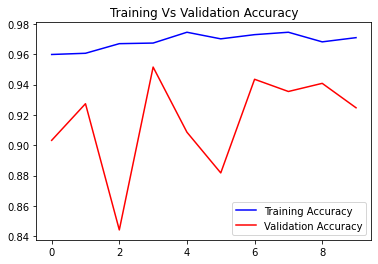

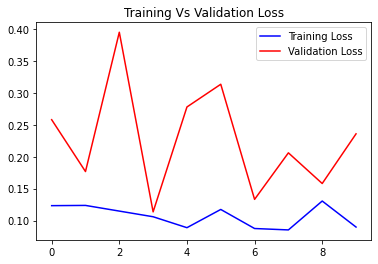

<Figure size 432x288 with 0 Axes>

In [0]:
#lets now plot the results :

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs,acc,'b',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'r',label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend(loc = 0)
plt.figure()

plt.plot(epochs,loss,'b',label = 'Training Loss')
plt.plot(epochs,val_loss,'r',label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [0]:
import numpy as np
from goolge.colab import files 
from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():

  # path = fn
path = '/tmp/img-1.jpg'
img = image.load_img(path,target_size = (150,150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])
classes = model.predict(images,batch_size = 10)
print(fn)
print(classes)

###Assignment 04 Sign Language MNIST

Exercise 4 - Multi-class classifier

Now that you've explored the concepts behind going from binary classification to multi class classification, it's time for another Exercise. In this one you'll use the Sign Language dataset from https://www.kaggle.com/datamunge/sign-language-mnist, and attempt to build a multi-class classifier to recognize sign language!

Let's build a multi-class classifier to recognize sign language!

NOTE: Please do not alter any of the provided code in the exercise. Only add your own code where indicated. Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position. Please use the provided epoch values when training. Once you have completed your notebook assignment and received a final score, please save your notebook, run the final cell, and close your Jupyter Workspace. This will help optimize your Jupyter workspace performance for future assessments. Please note that this step will shut down your kernel, so it is important to save your work in advance of completing this step

In [0]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [0]:
def get_data(filename):
    
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
#     with open(filename) as training_file:
#         data = np.genfromtxt(training_file, delimiter=',', skip_header=1)
#         labels = data[:, 0].astype(np.float)
#         images = data[:, 1:].astype(np.float)
#         images = np.reshape(images,(-1,28,28))
#         #Your code ends here
#         return images, labels
    
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')    
        imgs = []
        labels = []

        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
            
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

# training_images = np.reshape(training_images,(training_images.shape[0],training_images.shape[1],training_images.shape[2],1))# Your Code Here
# testing_images = np.reshape(testing_images,(testing_images.shape[0],testing_images.shape[1],testing_images.shape[2],1)) # Your Code Here

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    # Your Code Here
    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255
    # Your Code Here
)


# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    
    tf.keras.layers.Dense(26, activation = 'softmax')
    
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Your Code Here)


# Configure generators
train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=64
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=64
)

# Train the Model
history = model.fit_generator(train_generator, 
                              epochs = 2,
                              validation_data = validation_generator,
                              verbose = 1)
                              # Your Code Here (set 'epochs' = 2))

model.evaluate(testing_images, testing_labels, verbose = 0)

In [0]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

####Submission Instructions

In [0]:
# Now click the 'Submit Assignment' button above.

#### When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [0]:
# %%javascript
# <!-- Save the notebook -->
# IPython.notebook.save_checkpoint();

In [0]:
# %%javascript
# IPython.notebook.session.delete();
# window.onbeforeunload = null
# setTimeout(function() { window.close(); }, 1000);